In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
%matplotlib inline
pd.set_option('max_columns', 500)

for file in os.listdir('data/DataFiles/')[:-1]:
    df = pd.read_csv('data/DataFiles/' + file)
    print('File: {} / # of rows: {} / columns: {}'.format(file, len(df), df.columns))

File: Cities.csv / # of rows: 404 / columns: Index(['CityID', 'City', 'State'], dtype='object')
File: Conferences.csv / # of rows: 51 / columns: Index(['ConfAbbrev', 'Description'], dtype='object')
File: ConferenceTourneyGames.csv / # of rows: 4563 / columns: Index(['Season', 'ConfAbbrev', 'DayNum', 'WTeamID', 'LTeamID'], dtype='object')
File: GameCities.csv / # of rows: 43696 / columns: Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'CRType', 'CityID'], dtype='object')
File: NCAATourneyCompactResults.csv / # of rows: 2117 / columns: Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')
File: NCAATourneyDetailedResults.csv / # of rows: 981 / columns: Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAs

In [17]:
teams = pd.read_csv('data/DataFiles/teams.csv')
teams[teams['TeamName']=='Syracuse']

,TeamID,TeamName,FirstD1Season,LastD1Season
292,1393,Syracuse,1985,2018


In [109]:
reg_season = pd.read_csv('data/DataFiles/RegularSeasonDetailedResults.csv')
massey = pd.read_csv('data/MasseyOrdinals.csv')

In [110]:
syr_results = reg_season[(reg_season['WTeamID'] == 1393) | (reg_season['LTeamID'] == 1393)]

In [111]:
massey_pivot = pd.pivot_table(massey, 
                              'OrdinalRank', 
                              index=['Season', 'RankingDayNum', 'TeamID'], 
                              columns = 'SystemName').reset_index()
massey_pivot.head()

SystemName,Season,RankingDayNum,TeamID,7OT,ACU,ADE,AP,ARG,AUS,BBT,BCM,BD,BIH,BKM,BLS,BNM,BOB,BOW,BP5,BPI,BRZ,BUR,BWE,CJB,CMV,CNG,COL,CPA,CPR,CRO,CRW,CTL,D1A,DAV,DC,DC2,DCI,DDB,DES,DII,DOK,DOL,DUN,DWH,EBB,EBP,ECK,ENT,ERD,ESR,FAS,FMG,FSH,GC,GRN,GRS,HAS,HAT,HER,HKB,HKS,HOL,HRN,IMS,INP,ISR,JCI,JEN,JNG,JON,JRT,KBM,KEL,KLK,KMV,KOS,KPI,KPK,KRA,LMC,LOG,LYD,LYN,MAS,MB,MCL,MGY,MIC,MKV,MOR,MPI,MSX,MUZ,MvG,NOL,NOR,OCT,OMY,PEQ,PGH,PH,PIG,PKL,PMC,POM,PPR,PRR,PTS,RAG,REI,REN,REW,RIS,RM,ROG,ROH,RPI,RSE,RSL,RT,RTB,RTH,RTP,RTR,SAG,SAP,SAU,SCR,SE,SEL,SFX,SGR,SIM,SMN,SMS,SP,SPR,SPW,STF,STH,STR,STS,TBD,TMR,TOL,TPR,TRK,TRP,TRX,TSR,TW,UCS,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
0,2003,35,1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,35,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,35,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,35,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,35,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
massey_cleaned = massey_pivot.sort_values(['Season', 'TeamID', 'RankingDayNum']).fillna(method='ffill')

In [113]:
syr = pd.merge(syr_results, massey_cleaned, left_on=['WTeamID', 'DayNum', 'Season'], right_on=['TeamID', 'RankingDayNum', 'Season'], how='left')

In [114]:
syr = pd.merge(syr, massey_cleaned, left_on=['LTeamID', 'DayNum', 'Season'], right_on=['TeamID', 'RankingDayNum', 'Season'], how='left')

In [115]:
rankings = [rank for rank in massey_cleaned.columns if not any(y in rank for y in ('TeamID', 'Season', 'RankingDayNum'))]

for i in rankings:
    syr[i] = np.where(syr[i + '_x'].isnull(), syr[i + '_y'], syr[i + '_x'])

In [119]:
drops = [col for col in syr.columns if any(y in col for y in ('_x', '_y'))]

syr.drop(drops, axis=1).head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,7OT,ACU,ADE,AP,ARG,AUS,BBT,BCM,BD,BIH,BKM,BLS,BNM,BOB,BOW,BP5,BPI,BRZ,BUR,BWE,CJB,CMV,CNG,COL,CPA,CPR,CRO,CRW,CTL,D1A,DAV,DC,DC2,DCI,DDB,DES,DII,DOK,DOL,DUN,DWH,EBB,EBP,ECK,ENT,ERD,ESR,FAS,FMG,FSH,GC,GRN,GRS,HAS,HAT,HER,HKB,HKS,HOL,HRN,IMS,INP,ISR,JCI,JEN,JNG,JON,JRT,KBM,KEL,KLK,KMV,KOS,KPI,KPK,KRA,LMC,LOG,LYD,LYN,MAS,MB,MCL,MGY,MIC,MKV,MOR,MPI,MSX,MUZ,MvG,NOL,NOR,OCT,OMY,PEQ,PGH,PH,PIG,PKL,PMC,POM,PPR,PRR,PTS,RAG,REI,REN,REW,RIS,RM,ROG,ROH,RPI,RSE,RSL,RT,RTB,RTH,RTP,RTR,SAG,SAP,SAU,SCR,SE,SEL,SFX,SGR,SIM,SMN,SMS,SP,SPR,SPW,STF,STH,STR,STS,TBD,TMR,TOL,TPR,TRK,TRP,TRX,TSR,TW,UCS,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
0,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,20,1393,81,1434,66,H,0,25,58,7,18,24,35,11,26,19,13,10,4,18,23,63,4,18,16,23,17,26,13,20,10,3,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,29,1393,98,1159,68,H,0,35,63,8,13,20,32,12,31,23,13,10,10,11,26,75,10,27,6,8,19,21,17,16,6,0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,32,1393,85,1165,62,H,0,30,61,5,17,20,30,14,33,21,13,12,7,15,25,69,9,30,3,9,16,21,18,13,8,1,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,36,1393,92,1422,65,H,0,36,70,6,11,14,20,18,22,17,8,12,11,10,25,58,7,20,8,11,13,18,17,20,3,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Functions

In [9]:
# Remove bracket (W, S, E, N) from seed and convert to integer
def seed_to_int(seed):
    #Get just the digits from the seeding. Return as int
    s_int = int(seed[1:3])
    return s_int

def fit_and_evaluate(model, X_col, X_train, y_train, X_val, y_val):
    model_fit = model.fit(X_train[X_col], y_train)
    y_pred = model_fit.predict_proba(X_val[X_col])
    results = pd.concat([pd.DataFrame(y_pred[:,1]), 
                         pd.DataFrame(y_val).reset_index(drop=True)], axis=1)
    results.columns = ['pred', 'label']
    
    ll = log_loss(results['label'], results['pred'])
    
    bins = np.linspace(0, 1, 40)
    pyplot.hist(results[results['label'] == 1]['pred'], bins, alpha=0.5, normed=True, label='win')
    pyplot.hist(results[results['label'] == 0]['pred'], bins, alpha = 0.5, normed=True, label='loss')
    pyplot.legend(loc='upper left')
    pyplot.title('{} Results ({} log-loss)'.format(str(model).split('(')[0], round(ll, 3)))
    pyplot.show()

To Do:
- Concatenate season information (pts score, etc)
- Try stacking
    - Tournament seed model
    - Rankings model
    - Season stats model
    - Location model?

## Read in data

In [132]:
df_tour = pd.read_csv('data/DataFiles/NCAATourneyCompactResults.csv')
df_season = pd.read_csv('data/DataFiles/RegularSeasonCompactResults.csv')
df_seeds = pd.read_csv('data/DataFiles/NCAATourneySeeds.csv')
df_massey = pd.read_csv('data/MasseyOrdinals.csv')

## Create training and test set

In [133]:
df_tour.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)

# Create dataframe of wins
df_tour_wins = df_tour
df_tour_wins['Result'] = 1

# Create dataframe of losses
df_tour_losses = df_tour
df_tour_losses = df_tour_losses.rename(columns={
    'WTeamID': 'LTeamID',
    'LTeamID': 'WTeamID',
})
df_tour_losses['Result'] = 0

df_tourney_full = pd.concat([df_tour_wins, df_tour_losses])

X_train, X_test, y_train, y_test = train_test_split(df_tourney_full[['Season', 'WTeamID', 'LTeamID']], df_tourney_full['Result'], test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3)

print('Full: {} rows / Train: {} rows / Val: {} / Test: {} rows'.format(
    len(df_tourney_full), len(X_train), len(X_val), len(X_test)))

Full: 4234 rows / Train: 2117 rows / Val: 1481 / Test: 636 rows


## Tournament seeding model

In [136]:
df_seeds['Seed'] = df_seeds['Seed'].apply(lambda x: seed_to_int(x))

# Create copies of seeds df to join to winning ID and losing ID
df_winseeds = df_seeds.rename(columns={'TeamID':'WTeamID', 'Seed':'WSeed'})
df_lossseeds = df_seeds.rename(columns={'TeamID':'LTeamID', 'Seed':'LSeed'})

# Join seeds to training set
train_dummy = pd.merge(X_train, df_winseeds, how='left', on=['Season', 'WTeamID'])
X_train_seeds = pd.merge(train_dummy, df_lossseeds, on=['Season', 'LTeamID'])

# Join seeds to validation set
val_dummy = pd.merge(X_val, df_winseeds, how='left', on=['Season', 'WTeamID'])
X_val_seeds = pd.merge(val_dummy, df_lossseeds, on=['Season', 'LTeamID'])

# Join seeds to test set
test_dummy = pd.merge(X_test, df_winseeds, how='left', on=['Season', 'WTeamID'])
X_test_seeds = pd.merge(test_dummy, df_lossseeds, on=['Season', 'LTeamID'])

print('Training shape: {}'.format(X_train_seeds.shape))
print('Val shape: {}'.format(X_val_seeds.shape))
print('Test shape: {}'.format(X_test_seeds.shape))

Training shape: (2117, 5)
Val shape: (1481, 5)
Test shape: (636, 5)


In [137]:
# Define X columns and split into training and test sets
seeds_col = ['WSeed', 'LSeed']

# Define models to test
RF1 = RandomForestClassifier(n_estimators=200)
RF2 = RandomForestClassifier(n_estimators=400)
GBT1 = GradientBoostingClassifier(n_estimators=100, max_depth=3)
GBT2 = GradientBoostingClassifier(n_estimators=100, max_depth=5)
GBT3 = GradientBoostingClassifier(n_estimators=100, max_depth=7)
GBT4 = GradientBoostingClassifier(n_estimators=200, max_depth=3)
GBT5 = GradientBoostingClassifier(n_estimators=200, max_depth=5)
GBT6 = GradientBoostingClassifier(n_estimators=200, max_depth=7)
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)
LR1 = LogisticRegression()
LR2 = LogisticRegression(penalty='l1')
LR3 = LogisticRegression(C=0.1)
LR4 = LogisticRegression(penalty='l1', C=0.1)
LR5 = LogisticRegression(C=100)
LR6 = LogisticRegression(penalty='l1', C=100)
MLP1 = MLPClassifier()
MLP2 = MLPClassifier(max_iter=500)

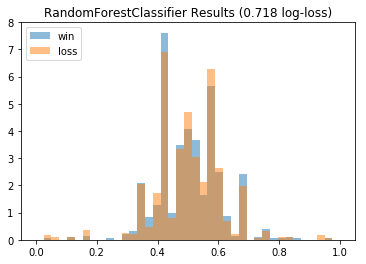

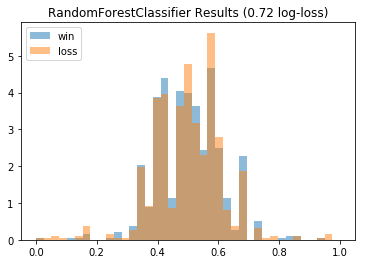

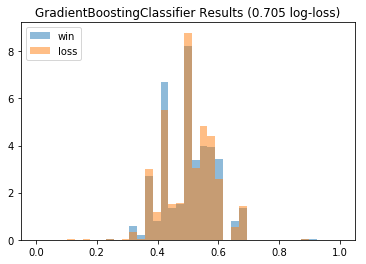

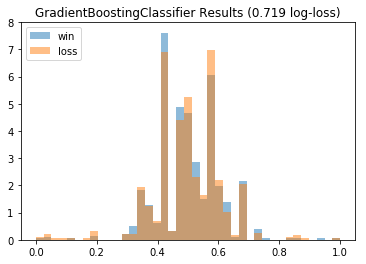

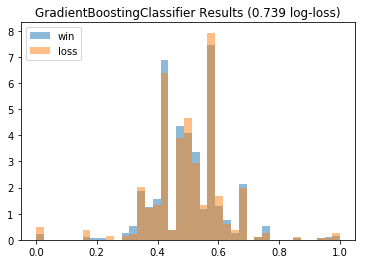

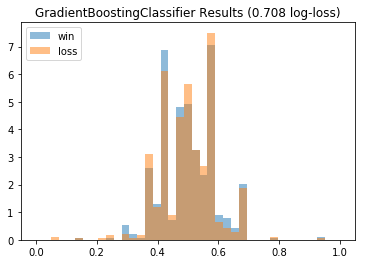

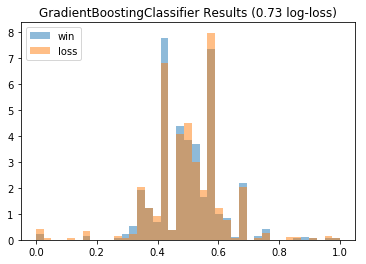

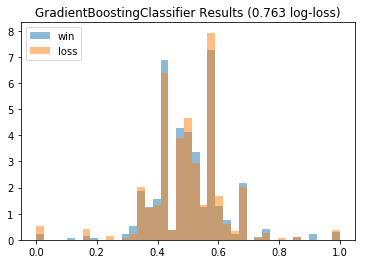

KeyboardInterrupt: 

In [138]:
fit_and_evaluate(RF1, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(RF2, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(GBT1, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(GBT2, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(GBT3, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(GBT4, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(GBT5, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(GBT6, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(Ada, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(LR1, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(LR2, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(LR3, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(LR4, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(LR5, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(LR6, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(MLP1, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)
fit_and_evaluate(MLP2, seeds_col, X_train_seeds, y_train, X_val_seeds, y_val)

## Rankings model

### Clean up the Massey rankings

In [15]:
# Pivot the rankings to have one ranking per column (one row per day/team/season)
df_massey_clean = pd.pivot_table(df_massey, 
                              'OrdinalRank', 
                              index=['Season', 'RankingDayNum', 'TeamID'], 
                              columns = 'SystemName').reset_index()

# Pull out the names of the rankings into a list
rankings = [rank for rank in df_massey_clean.columns 
                if not any(y in rank for y in ('TeamID', 'Season', 'RankingDayNum'))]

# Cycle through each team/season and fill NA w/ forward fill and append to empty df
# This is to fill all the days where there aren't new rankings out
rankings_df = pd.DataFrame()
for team in df_massey_clean['TeamID'].drop_duplicates():
    for year in df_massey_clean['Season'].drop_duplicates():
        line = df_massey_clean[(df_massey_clean['TeamID']==team) & (df_massey_clean['Season']==year)]
        line_clean = line.sort_values('RankingDayNum').fillna(method='ffill')
        rankings_df = rankings_df.append(line_clean)

In [139]:
# Pull out the rankings for: early in season, ~30 days before tournament, and on Selection sUNDAY
rankings_early = rankings_df[rankings_df['RankingDayNum'].between(45, 70, inclusive=True)]
rankings_mid = rankings_df[rankings_df['RankingDayNum'].between(90, 100, inclusive=True)]
rankings_late = rankings_df[rankings_df['RankingDayNum'].between(125, 135, inclusive=True)]

# Generate the mean of each ranking across these days
rankings_summary_early = rankings_early.groupby(['TeamID', 'Season']).mean()
rankings_summary_mid = rankings_mid.groupby(['TeamID', 'Season']).mean()
rankings_summary_late = rankings_late.groupby(['TeamID', 'Season']).mean()

# Take the average across ALL rankings
rankings_early_mean = rankings_summary_early[rankings].mean(axis=1)
rankings_mid_mean = rankings_summary_mid[rankings].mean(axis=1)

# Take the average, min, and max across ALL rankings
rankings_late_mean = rankings_summary_late[rankings].mean(axis=1)
rankings_late_min = rankings_summary_late[rankings].min(axis=1)
rankings_late_max = rankings_summary_late[rankings].max(axis=1)

# Concatenate all results into one df
rankings_full = pd.concat([rankings_early_mean, rankings_mid_mean, rankings_late_mean, rankings_late_min, 
                           rankings_late_max], axis=1).reset_index()
rankings_full.columns = ['TeamID', 'Season', 'rnk_mean_early', 'rnk_mean_mid', 'rnk_mean_late', 
                         'rnk_min_late', 'rnk_max_late']

In [140]:
# Create winning and losing dataframe to merge into tournament results
win_ranks = rankings_full.rename(columns={'TeamID': 'WTeamID',
                                          'rnk_mean_early':'Wrnk_mean_early',
                                          'rnk_mean_mid':'Wrnk_mean_mid',
                                          'rnk_mean_late':'Wrnk_mean_late',
                                          'rnk_min_late':'Wrnk_min_late',
                                          'rnk_max_late':'Wrnk_max_late'})
loss_ranks = rankings_full.rename(columns={'TeamID': 'LTeamID',
                                           'rnk_mean_early':'Lrnk_mean_early',
                                           'rnk_mean_mid':'Lrnk_mean_mid',
                                           'rnk_mean_late':'Lrnk_mean_late',
                                           'rnk_min_late':'Lrnk_min_late',
                                           'rnk_max_late':'Lrnk_max_late'})

# Join rankings to training set
train_dummy = pd.merge(X_train, win_ranks, how='left', on=['Season', 'WTeamID'])
X_train_ranks = pd.merge(train_dummy, loss_ranks, how='left', on=['Season', 'LTeamID'])

# Join rankings to validation set
val_dummy = pd.merge(X_val, win_ranks, how='left', on=['Season', 'WTeamID'])
X_val_ranks = pd.merge(val_dummy, loss_ranks, how='left', on=['Season', 'LTeamID'])

# Join rankings to test set
test_dummy = pd.merge(X_test, win_ranks, how='left', on=['Season', 'WTeamID'])
X_test_ranks = pd.merge(test_dummy, loss_ranks, how='left', on=['Season', 'LTeamID'])

print('Training shape: {}'.format(X_train_ranks.shape))
print('Val shape: {}'.format(X_val_ranks.shape))
print('Test shape: {}'.format(X_test_ranks.shape))

Training shape: (2117, 13)
Val shape: (1481, 13)
Test shape: (636, 13)


In [141]:
# Pull out columns that we want for our final training set
ranks_col = [col for col in X_train_ranks.columns 
       if not any(y in col for y in ('Season', 'WTeamID', 'LTeamID'))]
print(ranks_col)

X_train_ranks = X_train_ranks.fillna(500)
X_val_ranks = X_val_ranks.fillna(500)
X_test_ranks = X_test_ranks.fillna(500)

# Define models to test
RF1 = RandomForestClassifier(n_estimators=200)
RF2 = RandomForestClassifier(n_estimators=400)
GBT1 = GradientBoostingClassifier(n_estimators=100, max_depth=3)
GBT2 = GradientBoostingClassifier(n_estimators=100, max_depth=5)
GBT3 = GradientBoostingClassifier(n_estimators=100, max_depth=7)
GBT4 = GradientBoostingClassifier(n_estimators=200, max_depth=3)
GBT5 = GradientBoostingClassifier(n_estimators=200, max_depth=5)
GBT6 = GradientBoostingClassifier(n_estimators=200, max_depth=7)
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)
LR1 = LogisticRegression()
LR2 = LogisticRegression(penalty='l1')
LR3 = LogisticRegression(C=0.1)
LR4 = LogisticRegression(penalty='l1', C=0.1)
LR5 = LogisticRegression(C=100)
LR6 = LogisticRegression(penalty='l1', C=100)
MLP1 = MLPClassifier()
MLP2 = MLPClassifier(max_iter=500)

['Wrnk_mean_early', 'Wrnk_mean_mid', 'Wrnk_mean_late', 'Wrnk_min_late', 'Wrnk_max_late', 'Lrnk_mean_early', 'Lrnk_mean_mid', 'Lrnk_mean_late', 'Lrnk_min_late', 'Lrnk_max_late']


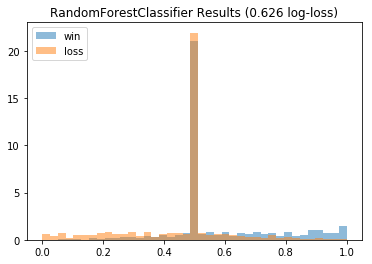

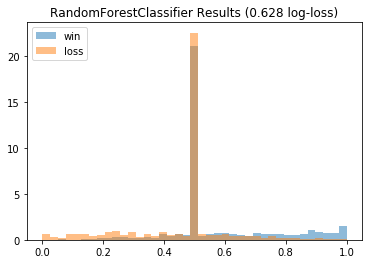

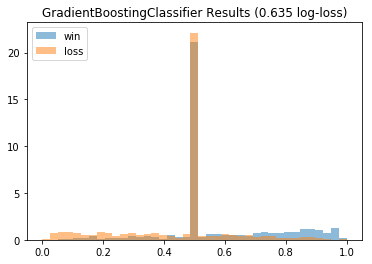

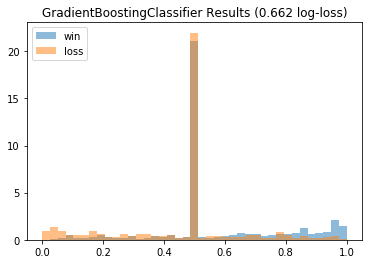

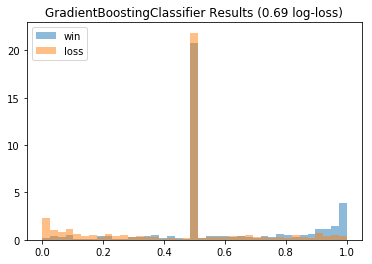

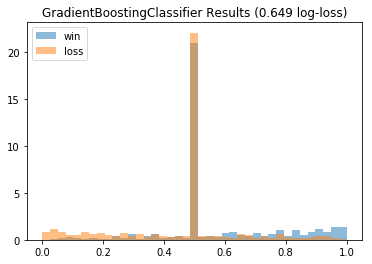

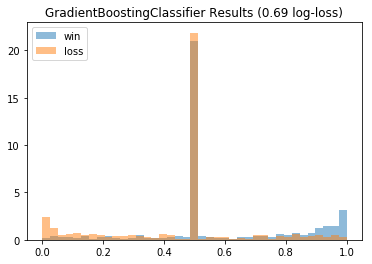

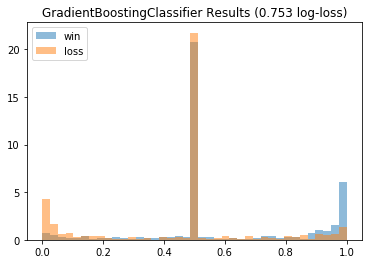

KeyboardInterrupt: 

In [142]:
fit_and_evaluate(RF1, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(RF2, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(GBT1, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(GBT2, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(GBT3, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(GBT4, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(GBT5, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(GBT6, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(Ada, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(LR1, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(LR2, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(LR3, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(LR4, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(LR5, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(LR6, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(MLP1, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)
fit_and_evaluate(MLP2, ranks_col, X_train_ranks, y_train, X_val_ranks, y_val)

## Elo Model

In [37]:
K = 20.
HOME_ADVANTAGE = 100.

team_ids = set(df_season.WTeamID).union(set(df_season.LTeamID))

elo_dict = dict(zip(list(team_ids), [1500] * len(team_ids)))

df_season['margin'] = df_season.WScore - df_season.LScore
df_season['w_elo'] = None
df_season['l_elo'] = None

def elo_pred(elo1, elo2):
    return(1. / (10. ** (-(elo1 - elo2) / 400.) + 1.))

def expected_margin(elo_diff):
    return((7.5 + 0.006 * elo_diff))

def elo_update(w_elo, l_elo, margin):
    elo_diff = w_elo - l_elo
    pred = elo_pred(w_elo, l_elo)
    mult = ((margin + 3.) ** 0.8) / expected_margin(elo_diff)
    update = K * mult * (1 - pred)
    return(pred, update)

assert np.all(df_season.index.values == np.array(range(df_season.shape[0]))), "Index is out of order."

In [39]:
preds = []

# Loop over all rows of the games dataframe
for i in range(df_season.shape[0]):
    
    # Get key data from current row
    w = df_season.at[i, 'WTeamID']
    l = df_season.at[i, 'LTeamID']
    margin = df_season.at[i, 'margin']
    wloc = df_season.at[i, 'WLoc']
    
    # Does either team get a home-court advantage?
    w_ad, l_ad, = 0., 0.
    if wloc == "H":
        w_ad += HOME_ADVANTAGE
    elif wloc == "A":
        l_ad += HOME_ADVANTAGE
    
    # Get elo updates as a result of the game
    pred, update = elo_update(elo_dict[w] + w_ad,
                              elo_dict[l] + l_ad, 
                              margin)
    elo_dict[w] += update
    elo_dict[l] -= update
    preds.append(pred)

    # Stores new elos in the games dataframe
    df_season.loc[i, 'w_elo'] = elo_dict[w]
    df_season.loc[i, 'l_elo'] = elo_dict[l]

In [40]:
df_season.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,margin,w_elo,l_elo
150679,2017,132,1276,71,1458,56,N,0,15,1904.71,1936.38
150680,2017,132,1343,71,1463,59,N,0,12,1710.38,1584.06
150681,2017,132,1348,70,1433,63,N,0,7,1790.62,1841.22
150682,2017,132,1374,71,1153,56,N,0,15,1965.93,1906.94
150683,2017,132,1407,59,1402,53,N,0,6,1447.51,1449.7


In [54]:
def final_elo_per_season(df, team_id):
    d = df.copy()
    d = d.loc[(d.WTeamID == team_id) | (d.LTeamID == team_id), :]
    d.sort_values(['Season', 'DayNum'], inplace=True)
    d.drop_duplicates(['Season'], keep='last', inplace=True)
    w_mask = d.WTeamID == team_id
    l_mask = d.LTeamID == team_id
    d['season_elo'] = None
    d.loc[w_mask, 'season_elo'] = d.loc[w_mask, 'w_elo']
    d.loc[l_mask, 'season_elo'] = d.loc[l_mask, 'l_elo']
    out = pd.DataFrame({
        'TeamID': team_id,
        'Season': d.Season,
        'season_elo': d.season_elo
    })
    return(out)

df_list = [final_elo_per_season(df_season, i) for i in team_ids]
season_elos = pd.concat(df_list)

season_elos.sample(10)

,Season,TeamID,season_elo
69216,2001,1227,1429.12
23377,1990,1436,1254.48
102127,2008,1342,1352.7
51865,1997,1135,1213.97
87832,2005,1153,1898.61
145222,2016,1161,1650.92
118469,2011,1454,1614.52
113308,2010,1261,1651.86
118540,2011,1410,1124.65
23333,1990,1270,1471.81


In [143]:
# Create winning and losing dataframe to merge into tournament results
win_elo = season_elos.rename(columns={'TeamID': 'WTeamID',
                                          'season_elo':'Wseason_elo'})
loss_elo = season_elos.rename(columns={'TeamID': 'LTeamID',
                                           'season_elo':'Lseason_elo'})

# Join rankings to training set
train_dummy = pd.merge(X_train, win_elo, how='left', on=['Season', 'WTeamID'])
X_train_elo = pd.merge(train_dummy, loss_elo, how='left', on=['Season', 'LTeamID'])

# Join rankings to validation set
val_dummy = pd.merge(X_val, win_elo, how='left', on=['Season', 'WTeamID'])
X_val_elo = pd.merge(val_dummy, loss_elo, how='left', on=['Season', 'LTeamID'])

# Join rankings to test set
test_dummy = pd.merge(X_test, win_elo, how='left', on=['Season', 'WTeamID'])
X_test_elo = pd.merge(test_dummy, loss_elo, how='left', on=['Season', 'LTeamID'])

print('Training shape: {}'.format(X_train_elo.shape))
print('Val shape: {}'.format(X_val_elo.shape))
print('Test shape: {}'.format(X_test_elo.shape))

Training shape: (2117, 5)
Val shape: (1481, 5)
Test shape: (636, 5)


In [144]:
# Define X columns and split into training and test sets
elo_col = ['Wseason_elo', 'Lseason_elo']

# Define models to test
RF1 = RandomForestClassifier(n_estimators=200)
RF2 = RandomForestClassifier(n_estimators=400)
GBT1 = GradientBoostingClassifier(n_estimators=100, max_depth=3)
GBT2 = GradientBoostingClassifier(n_estimators=100, max_depth=5)
GBT3 = GradientBoostingClassifier(n_estimators=100, max_depth=7)
GBT4 = GradientBoostingClassifier(n_estimators=200, max_depth=3)
GBT5 = GradientBoostingClassifier(n_estimators=200, max_depth=5)
GBT6 = GradientBoostingClassifier(n_estimators=200, max_depth=7)
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)
LR1 = LogisticRegression()
LR2 = LogisticRegression(penalty='l1')
LR3 = LogisticRegression(C=0.1)
LR4 = LogisticRegression(penalty='l1', C=0.1)
LR5 = LogisticRegression(C=100)
LR6 = LogisticRegression(penalty='l1', C=100)
MLP1 = MLPClassifier()
MLP2 = MLPClassifier(max_iter=500)

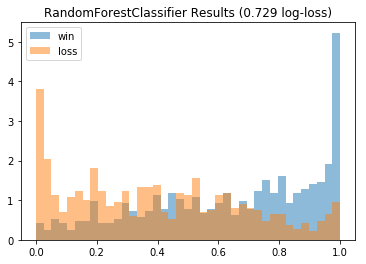

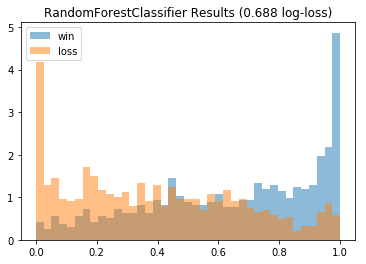

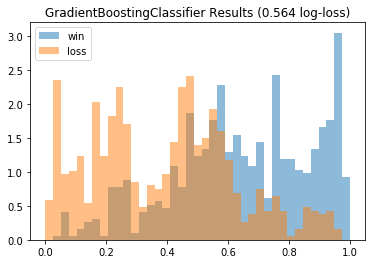

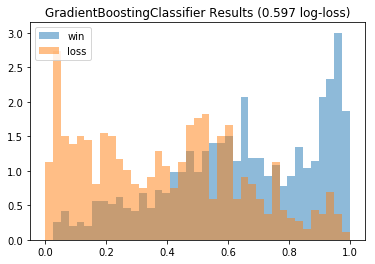

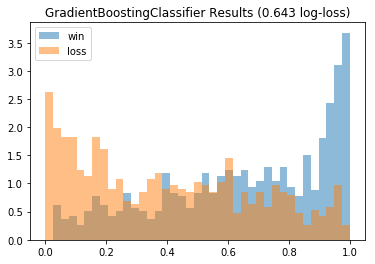

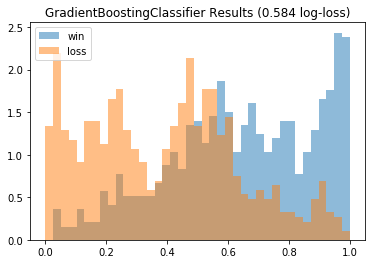

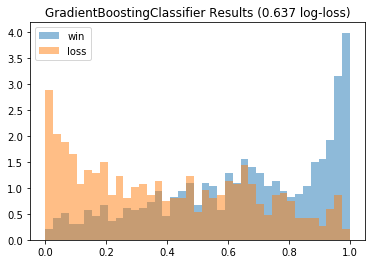

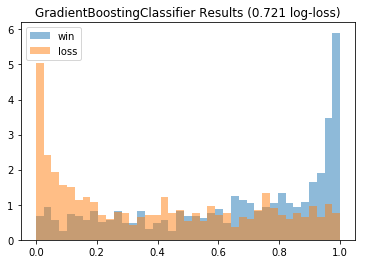

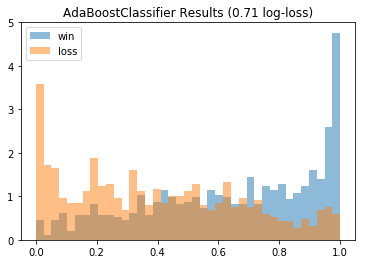

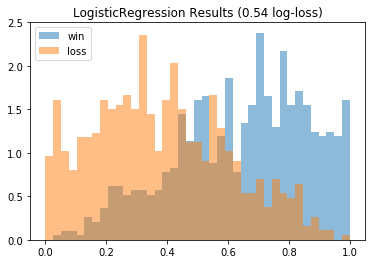

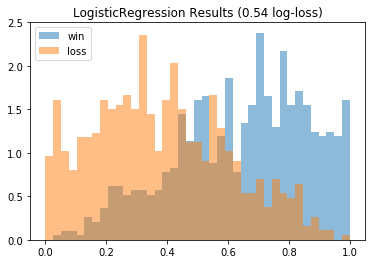

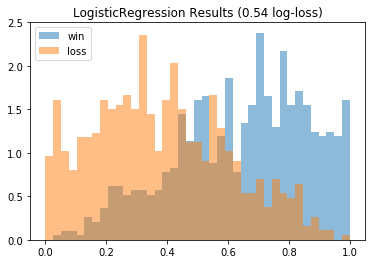

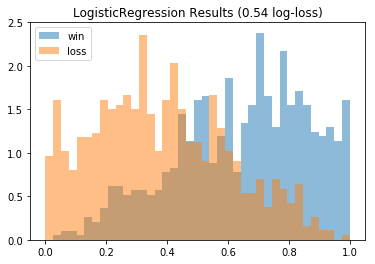

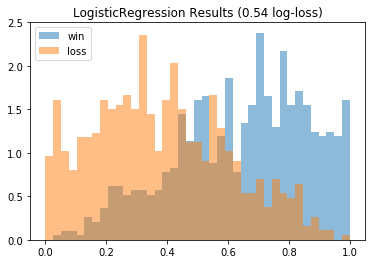

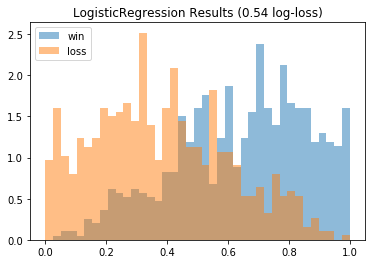

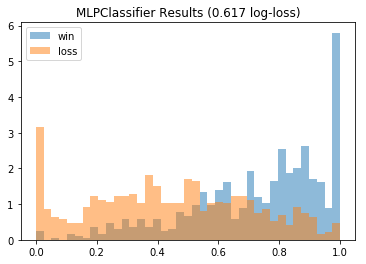

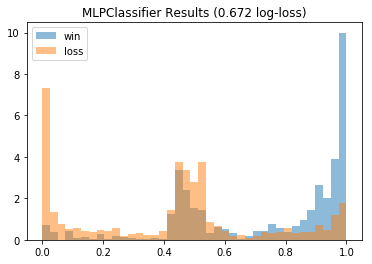

In [145]:
fit_and_evaluate(RF1, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(RF2, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(GBT1, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(GBT2, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(GBT3, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(GBT4, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(GBT5, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(GBT6, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(Ada, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(LR1, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(LR2, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(LR3, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(LR4, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(LR5, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(LR6, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(MLP1, elo_col, X_train_elo, y_train, X_val_elo, y_val)
fit_and_evaluate(MLP2, elo_col, X_train_elo, y_train, X_val_elo, y_val)

## Stack Models

### Final Model Fitting

In [ ]:
# Seeds model
GBT = GradientBoostingClassifier(n_estimators=100, max_depth=3)
LR = LogisticRegression()
MLP = MLPClassifier()

GBT_seeds_fit = GBT.fit(X_train_seeds[seeds_col], y_train)
LR_seeds_fit = LR.fit(X_train_seeds[seeds_col], y_train)
MLP_seeds_fit = MLP.fit(X_train_seeds[seeds_col], y_train)

GBT_seeds_val_pred = GBT_seeds_fit.predict_proba(X_val_seeds[seeds_col])
LR_seeds_val_pred = LR_seeds_fit.predict_proba(X_val_seeds[seeds_col])
MLP_seeds_val_pred = MLP_seeds_fit.predict_proba(X_val_seeds[seeds_col])

GBT_seeds_test_pred = GBT_seeds_fit.predict_proba(X_test_seeds[seeds_col])
LR_seeds_test_pred = LR_seeds_fit.predict_proba(X_test_seeds[seeds_col])
MLP_seeds_test_pred = MLP_seeds_fit.predict_proba(X_test_seeds[seeds_col])

# Ranks model
RF = RandomForestClassifier(n_estimators=500)
LR = LogisticRegression()
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)

RF_ranks_fit = RF.fit(X_train_ranks[ranks_col], y_train)
LR_ranks_fit = LR.fit(X_train_ranks[ranks_col], y_train)
Ada_ranks_fit = Ada.fit(X_train_ranks[ranks_col], y_train)

RF_ranks_val_pred = RF_ranks_fit.predict_proba(X_val_ranks[ranks_col])
LR_ranks_val_pred = LR_ranks_fit.predict_proba(X_val_ranks[ranks_col])
Ada_ranks_val_pred = Ada_ranks_fit.predict_proba(X_val_ranks[ranks_col])

RF_ranks_test_pred = RF_ranks_fit.predict_proba(X_test_ranks[ranks_col])
LR_ranks_test_pred = LR_ranks_fit.predict_proba(X_test_ranks[ranks_col])
Ada_ranks_test_pred = Ada_ranks_fit.predict_proba(X_test_ranks[ranks_col])

# Elo model
GBT = GradientBoostingClassifier(n_estimators=100, max_depth=3)
LR = LogisticRegression(penalty='l1', C=100)
RF = RandomForestClassifier(n_estimators=500)

GBT_elo_fit = GBT.fit(X_train_elo[elo_col], y_train)
LR_elo_fit = LR.fit(X_train_elo[elo_col], y_train)
RF_elo_fit = RF.fit(X_train_elo[elo_col], y_train)

GBT_elo_val_pred = GBT_elo_fit.predict_proba(X_val_elo[elo_col])
LR_elo_val_pred = LR_elo_fit.predict_proba(X_val_elo[elo_col])
RF_elo_val_pred = RF_elo_fit.predict_proba(X_val_elo[elo_col])

GBT_elo_test_pred = GBT_elo_fit.predict_proba(X_test_elo[elo_col])
LR_elo_test_pred = LR_elo_fit.predict_proba(X_test_elo[elo_col])
RF_elo_test_pred = RF_elo_fit.predict_proba(X_test_elo[elo_col])

### Aggregate Results

In [ ]:
val_results = pd.concat([X_val.reset_index(drop=True),
                          pd.DataFrame(y_val).reset_index(drop=True),
                          pd.DataFrame(GBT_seeds_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_seeds_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(MLP_seeds_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(RF_ranks_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_ranks_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(Ada_ranks_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(GBT_elo_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_elo_val_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(RF_elo_val_pred[:,1]).reset_index(drop=True)], axis=1)
val_results.columns = ['Season', 'WTeamID', 'LTeamID', 'label', 'GBT_seed', 'LR_seed', 'MLP_seed', 
                       'RF_rank', 'LR_rank', 'Ada_rank', 'GBT_elo', 'LR_elo', 'RF_elo']

test_results = pd.concat([X_test.reset_index(drop=True),
                          pd.DataFrame(y_test).reset_index(drop=True),
                          pd.DataFrame(GBT_seeds_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_seeds_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(MLP_seeds_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(RF_ranks_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_ranks_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(Ada_ranks_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(GBT_elo_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(LR_elo_test_pred[:,1]).reset_index(drop=True),
                          pd.DataFrame(RF_elo_test_pred[:,1]).reset_index(drop=True)], axis=1)
test_results.columns = ['Season', 'WTeamID', 'LTeamID', 'label', 'GBT_seed', 'LR_seed', 'MLP_seed', 
                       'RF_rank', 'LR_rank', 'Ada_rank', 'GBT_elo', 'LR_elo', 'RF_elo']

In [ ]:
final_col = [col for col in val_results.columns 
                if any(y in col for y in ('_rank', '_elo'))]
print(final_col)

RF1 = RandomForestClassifier(n_estimators=200)
RF2 = RandomForestClassifier(n_estimators=400)
GBT1 = GradientBoostingClassifier(n_estimators=100, max_depth=3)
GBT2 = GradientBoostingClassifier(n_estimators=100, max_depth=5)
GBT3 = GradientBoostingClassifier(n_estimators=100, max_depth=7)
GBT4 = GradientBoostingClassifier(n_estimators=200, max_depth=3)
GBT5 = GradientBoostingClassifier(n_estimators=200, max_depth=5)
GBT6 = GradientBoostingClassifier(n_estimators=200, max_depth=7)
Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=150)
LR1 = LogisticRegression()
LR2 = LogisticRegression(penalty='l1')
LR3 = LogisticRegression(C=0.1)
LR4 = LogisticRegression(penalty='l1', C=0.1)
LR5 = LogisticRegression(C=100)
LR6 = LogisticRegression(penalty='l1', C=100)
MLP1 = MLPClassifier()
MLP2 = MLPClassifier(max_iter=500)

In [ ]:
fit_and_evaluate(RF1, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(RF2, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(GBT1, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(GBT2, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(GBT3, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(GBT4, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(GBT5, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(GBT6, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(Ada, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(LR1, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(LR2, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(LR3, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(LR4, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(LR5, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(LR6, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(MLP1, final_col, val_results, val_results['label'], test_results, y_test)
fit_and_evaluate(MLP2, final_col, val_results, val_results['label'], test_results, y_test)

In [101]:
X_train_seeds[X_train_seeds['Season'] < 1999]

,Season,WTeamID,LTeamID,WSeed,LSeed
5,1995,1400,1268,11,3
10,1998,1155,1444,6,11
11,1990,1328,1314,1,8
14,1998,1390,1246,3,2
15,1998,1354,1246,15,2
16,1998,1181,1246,1,2
17,1998,1417,1246,6,2
22,1992,1418,1308,13,12
23,1992,1177,1308,5,12
26,1989,1375,1276,11,3


In [95]:
test_results.groupby(['Season', 'label']).mean()

,,WTeamID,LTeamID,GBT_seed,LR_seed,MLP_seed,RF_rank,LR_rank,Ada_rank,GBT_elo,LR_elo,RF_elo
Season,label,,,,,,,,,,,
1985,0,1324.833333,1296.333333,0.326302,0.318606,0.317738,0.000000,0.001369,2.220446e-16,0.044558,0.180565,0.024000
1986,0,1326.285714,1235.142857,0.297572,0.315612,0.320742,0.000000,0.001369,2.220446e-16,0.046660,0.215036,0.013143
1987,0,1336.272727,1346.545455,0.320977,0.317038,0.293403,0.000000,0.001369,2.220446e-16,0.103388,0.211055,0.102182
1988,0,1246.272727,1301.545455,0.294176,0.317189,0.311414,0.000000,0.001369,2.220446e-16,0.156194,0.241983,0.123818
1989,0,1297.600000,1273.000000,0.316999,0.320765,0.326279,0.000000,0.001369,2.220446e-16,0.203858,0.281655,0.180600
1990,0,1284.636364,1279.272727,0.325885,0.314800,0.311177,0.000000,0.001369,2.220446e-16,0.137365,0.157925,0.157091
1991,0,1343.454545,1288.727273,0.326016,0.312592,0.310855,0.000000,0.001369,2.220446e-16,0.170008,0.199800,0.191818
1992,0,1362.727273,1273.000000,0.327849,0.314920,0.309835,0.000000,0.001369,2.220446e-16,0.132057,0.186979,0.114545
1993,0,1293.900000,1297.900000,0.322442,0.315312,0.314958,0.000000,0.001369,2.220446e-16,0.091628,0.135600,0.094600
